In [3]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.gridspec as gridspec
from matplotlib import cm

<function matplotlib.pyplot.show(close=None, block=None)>

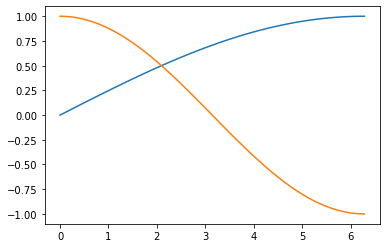

In [4]:
# Graficar varias funciones en un mismo plot:
Lx = Ly = 2 * np.pi
x = np.linspace(0,Lx,64)
y = np.linspace(0,Ly,64)
plt.plot(x,np.sin(x*np.pi/2/Lx),label='x')
plt.plot(y,np.cos(y*np.pi/Ly),label='y')
plt.show

(64, 64)


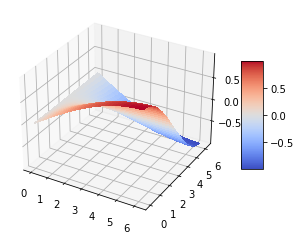

In [5]:
# Grafico en 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
XX = np.arange(0, Lx, Lx/64)
YY = np.arange(0, Ly, Ly/64)
XX, YY = np.meshgrid(XX, YY)
R = np.sqrt(XX**2 + YY**2)
ZZ = np.sin(XX*np.pi/2/Lx)*np.cos(YY*np.pi/Ly)
#print(XX)
print(ZZ.shape)
# Plot the surface.
surf = ax.plot_surface(XX, YY, ZZ, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

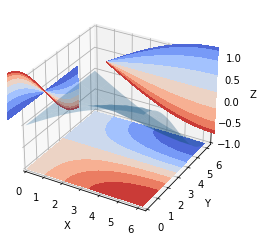

In [6]:
# Plot 3D y proyecciones en los 3 ejes
ax = plt.figure().add_subplot(projection='3d')
# Plot the 3D surface
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contourf(XX, YY, ZZ, zdir='z', offset=-1, cmap=cm.coolwarm)
cset = ax.contourf(XX, YY, ZZ, zdir='x', offset=0-1, cmap=cm.coolwarm)
cset = ax.contourf(XX, YY, ZZ, zdir='y', offset=Ly+1, cmap=cm.coolwarm)

ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_zlim(-1, 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

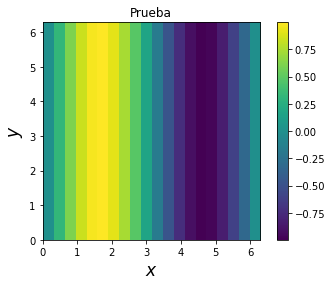

In [7]:
# Plot 2D xy:
rango=(0,Lx,0,Ly)
X = np.linspace(0,Lx,20)
Y = np.linspace(0,Ly,20)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)
#print(Z)
plt.imshow(Z, cmap='viridis', extent=rango,origin='lower')
plt.title('Prueba')
plt.ylabel(r'${y}$',fontsize=17)  
plt.xlabel(r'${x}$',fontsize=17)
plt.colorbar()
plt.show()

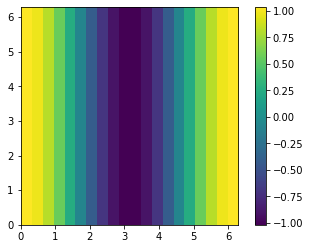

In [8]:
# Calculo de gradiente y plot
x_grad = np.gradient(Z, Lx/20, axis=1, edge_order=1)
y_grad = np.gradient(Z, Ly/20, axis=0, edge_order=1)
rango=(0,Lx,0,Ly)
plt.imshow(x_grad, cmap='viridis', extent=rango,origin='lower')
plt.colorbar()

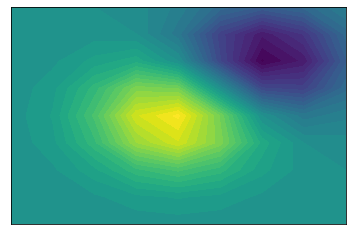

In [9]:
# Otro plot
extent = (-3, 3, -3, 3)

delta = 0.5
x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = Z1 - Z2

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

fig, ax = plt.subplots()
cset1 = ax.contourf(X, Y, Z, 40,norm=norm)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("contour_frontpage.png", dpi=25)  # results in 160x120 px image
plt.show()

Help on method set_data in module matplotlib.lines:

set_data(*args) method of matplotlib.lines.Line2D instance
    Set the x and y data.
    
    Parameters
    ----------
    *args : (2, N) array or two 1D arrays

None
None
None
None


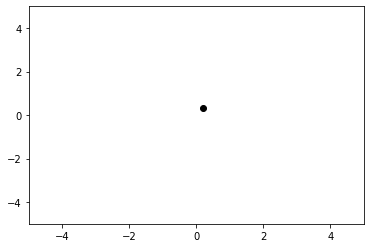

In [13]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')
help(l.set_data)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(4):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        print(l.set_data(x0, y0))
        writer.grab_frame()
